In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from time import sleep
import json

# Getting Data From API

API Docs: https://developers.themoviedb.org/3/getting-started/introduction
Endpoints Used:

/discover/movie

/movie/{movie_id}

In [1]:
api_key= "b1541f3ce3b0d884b5d7519402b49e49"

In [3]:
def api_call(api_key: str, endpoint: str) -> dict:
  '''
  Get data from endpoint
  Return data as dictionary

  endpoint structure: /movie/popular etc
  '''
  page_num  = 1
  data = []
  while True:
    print(f"Calling page {page_num}")
    url = f"https://api.themoviedb.org/3{endpoint}?api_key={api_key}&language=en-US&page={page_num}"
    print(f"Calling url: {url}")
    req = requests.get(url)
    if req.status_code == 200:
      data.append(req.json())
    elif req.status_code <500 and req.status_code>=400:
      print("Endpoint doesnt exist/Completed")
      return data
      break
    elif req.status_code >= 500:
      print("Their api server error")
      break
    else:
      print(f"Status code: {req.status_code}")
      print("Error")
      break
    page_num += 1
    sleep(1) # Prevent spamming get requests to api endpoint
    
def api_call_movie(api_key: str, movie_id: str) -> dict:
    '''
    Get data from endpoint
    Return data as dictionary

    endpoint structure: /movie/popular etc
    '''
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&append_to_response=credits,keywords,release_dates"
    req = requests.get(url)
    if req.status_code == 200:
        return req.json()
    elif req.status_code <500 and req.status_code>=400:
        print("Endpoint doesnt exist/Completed")
        return 

    elif req.status_code >= 500:
        print("Their api server error")
        return
    else:
        print(f"Status code: {req.status_code}")
        print("Error")
        return


def write_to_json(data: dict, filename: str) -> str:
  with open(filename, 'w') as f:
    json.dump(data, f)
  return filename


def read_json(filename: str) -> dict:
  with open(filename, 'r') as f:
    return json.load(f)


Get a list of movies from /discover/movie endpoint. However the movie details here are quite limited. So we get the movie id so that we can use the endpoint /movie/{movie_id} in order to get more specific information about the movies

In [6]:
data = api_call(api_key, "/discover/movie")
write_to_json(data, "listofmovie.json")

Calling page 1
Calling url: https://api.themoviedb.org/3/discover/movie?api_key=b1541f3ce3b0d884b5d7519402b49e49&language=en-US&page=1
Calling page 2
Calling url: https://api.themoviedb.org/3/discover/movie?api_key=b1541f3ce3b0d884b5d7519402b49e49&language=en-US&page=2
Calling page 3
Calling url: https://api.themoviedb.org/3/discover/movie?api_key=b1541f3ce3b0d884b5d7519402b49e49&language=en-US&page=3
Calling page 4
Calling url: https://api.themoviedb.org/3/discover/movie?api_key=b1541f3ce3b0d884b5d7519402b49e49&language=en-US&page=4
Calling page 5
Calling url: https://api.themoviedb.org/3/discover/movie?api_key=b1541f3ce3b0d884b5d7519402b49e49&language=en-US&page=5


KeyboardInterrupt: 

In [7]:
movie_id = []
for page_data in data:
    for result_data in page_data['results']:
        movie_id.append(result_data['id'])

NameError: name 'data' is not defined

In [ ]:
len(movie_id)

In [8]:
movie_detail = []
cnt = 0
for _id in movie_id:
    movie_detail.append(api_call_movie(api_key, _id))
    cnt+=1
    

In [3]:
write_to_json(movie_detail, "movie_detail.json")

NameError: name 'data' is not defined

# Data Preparation

Formatting data and convert into dataframe

In [10]:
movie_detail = read_json("movie_detail.json")

In [11]:
clean_data = {'id':[],'name': [], 'runtime':[],'genres':[],'keywords':[],'production_companies':[],'age_rating':[],'actor':[],
              'budget':[], 'popularity':[]}
i=0
for movie in movie_detail:
    if(i==6106):
        break
    i+=1
    st = False
    #print(movie["release_dates"]['results'])
    for certification in movie["release_dates"]['results']:
        if (certification["iso_3166_1"] == 'US'):
            st = True
            clean_data['age_rating'].append(certification['release_dates'][0]["certification"])
            break
    
    if st==False:
        continue
        
    # id
    clean_data['id'].append(movie['id'])
    
    # name
    clean_data['name'].append(movie['original_title'])
    
    # runtime
    clean_data['runtime'].append(movie['runtime'])
    
    #genres
    genres_list = []
    for genre in movie['genres']:
        genres_list.append(genre['id'])
    clean_data['genres'].append(genres_list)
    keywords_list = []
    for keywords in movie['keywords']['keywords']:
        keywords_list.append(keywords['id'])
    clean_data['keywords'].append(keywords_list)
    production_companies = []
    for production in movie['production_companies']:
        production_companies.append(production['id'])
    clean_data['production_companies'].append(production_companies)
    
    #Cast
    actor_list = []
    for actor in movie['credits']['cast']:
        actor_list.append(actor['id'])
    clean_data['actor'].append(actor_list)
    
    #budget
    clean_data['budget'].append(movie['budget'])

    #budget
    clean_data['popularity'].append(movie['popularity'])
    
    

Create DataFrame for the clean data

In [12]:
df = pd.DataFrame(clean_data)
df.head()

,id,name,runtime,genres,keywords,production_companies,age_rating,actor,budget,popularity
0,527774,Raya and the Last Dragon,107,"[16, 12, 14, 10751, 28]","[780, 1820, 1938, 3389, 10159, 12554, 167234, ...","[2, 6125]",PG,"[1663195, 1625558, 2362044, 97576, 18307, 3008...",0,4135.696
1,587807,Tom & Jerry,101,"[28, 35, 10751, 16, 12]","[10159, 163178, 209220, 277447, 277448]","[25120, 174, 8922, 77061]",PG,"[13620, 33923, 15098, 15831, 224092, 1688196, ...",50000000,2347.397
2,484718,Coming 2 America,110,[35],"[409, 3071, 5515, 9663, 155954]","[4, 114732, 30, 11581, 20580]",PG-13,"[776, 44994, 1488960, 168452, 56903, 1884703, ...",60000000,1643.016
3,458576,Monster Hunter,104,"[14, 28, 12]","[11024, 12446, 18101, 41645, 196068, 196984, 2...","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13,"[63, 57207, 76126, 2372, 935201, 22122, 105605...",60000000,1765.484
4,464052,Wonder Woman 1984,151,"[14, 28, 12]","[849, 9715, 9717, 208289, 219404, 229266]","[9993, 174, 114152, 128064, 507, 429]",PG-13,"[90633, 62064, 41091, 1253360, 32, 935, 182998...",200000000,1914.199


In [13]:
for k,v in clean_data.items():
    print(k, len(v))

id 5467
name 5467
runtime 5467
genres 5467
keywords 5467
production_companies 5467
age_rating 5467
actor 5467
budget 5467
popularity 5467


In [14]:
df['age_rating'].astype("category")

0          PG
1          PG
2       PG-13
3       PG-13
4       PG-13
        ...  
5462        R
5463       PG
5464         
5465        G
5466        G
Name: age_rating, Length: 5467, dtype: category
Categories (9, object): ['', 'G', 'NC-17', 'NR', ..., 'PG-13', 'R', 'TV-PG', 'TV-Y7']

# Exploratory Analysis

In [16]:
df.describe()

,id,runtime,budget,popularity
count,5467.000000,5467.000000,5.467000e+03,5467.000000
mean,224044.605451,101.842144,2.791579e+07,39.457349
std,236163.033219,25.825007,4.457509e+07,105.975975
min,5.000000,0.000000,0.000000e+00,9.445000
25%,10754.500000,90.000000,0.000000e+00,16.689500
50%,103663.000000,100.000000,8.500000e+06,21.982000
75%,425235.000000,115.000000,3.700000e+07,33.931500
max,803411.000000,400.000000,3.870000e+08,4135.696000


## Exploratory Analysis - Data Visualization

### Age_rating against runtime

<AxesSubplot:xlabel='budget', ylabel='age_rating'>

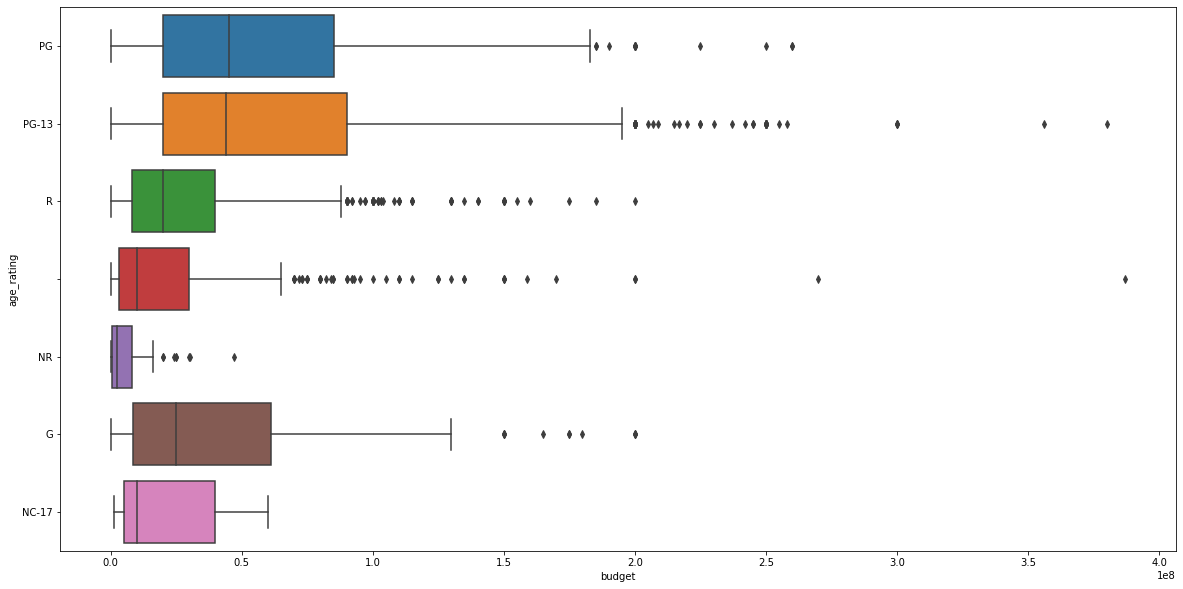

In [27]:
## Checking Relationship between runtime and age_rating
f = plt.figure(figsize=(20,10))
sb.boxplot(x='runtime', y='age_rating' , data = df, orient='h')

### Age rating against Budget (that are >500)

<AxesSubplot:xlabel='budget', ylabel='age_rating'>

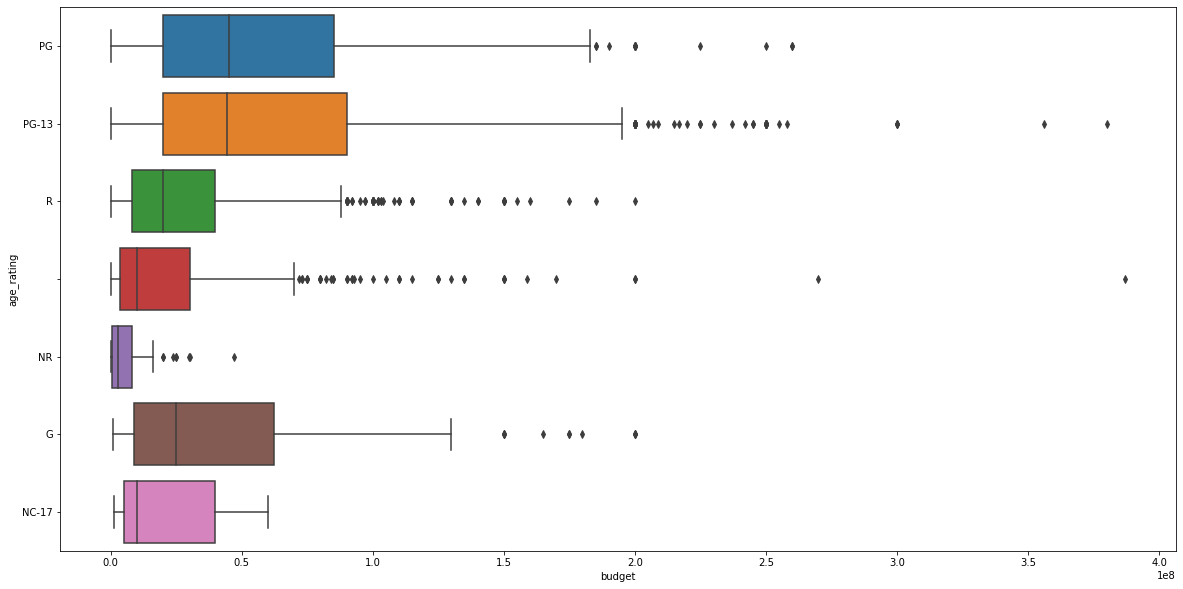

In [6]:
# checking between budget and age_rating

f = plt.figure(figsize=(20,10))
sb.boxplot(x='budget', y='age_rating' , data = df[ df['budget']>500 ], orient='h')

### Age rating against popularity (that are >300)

<AxesSubplot:xlabel='popularity', ylabel='age_rating'>

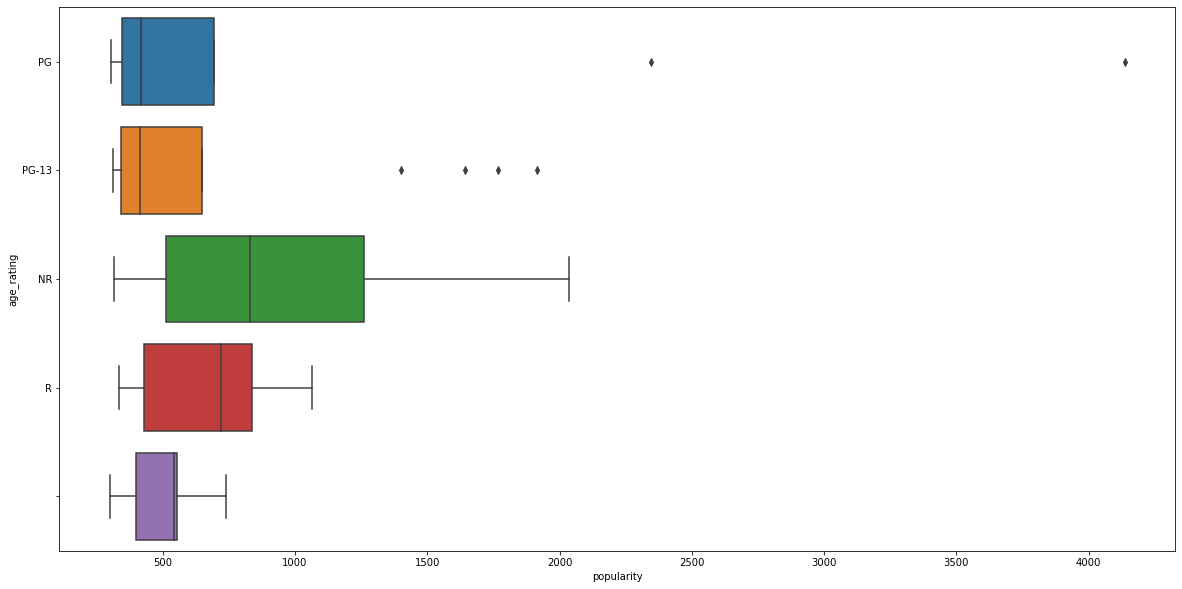

In [45]:
# checking between budget and age_rating

f = plt.figure(figsize=(20,10))
sb.boxplot(x='popularity', y='age_rating' , data = df[ df['popularity']>300], orient='h')

In [ ]:
f = plt.figure(figsize=(20,10))
sb.violinplot(df['popularity'])


### See the distribution of age_rating

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_rating', ylabel='count'>

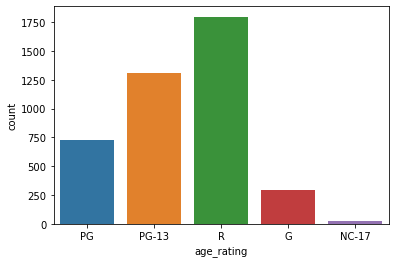

In [108]:
sb.countplot(df['age_rating'])

### Check the meaning of the certification

In [89]:
url = f"https://api.themoviedb.org/3/certification/movie/list?api_key={api_key}"
req = requests.get(url)
certification_list = req.json()

In [95]:
certification_list['certifications']['US']

[{'certification': 'R',
  'meaning': 'Under 17 requires accompanying parent or adult guardian 21 or older. The parent/guardian is required to stay with the child under 17 through the entire movie, even if the parent gives the child/teenager permission to see the film alone. These films may contain strong profanity, graphic sexuality, nudity, strong violence, horror, gore, and strong drug use. A movie rated R for profanity often has more severe or frequent language than the PG-13 rating would permit. An R-rated movie may have more blood, gore, drug use, nudity, or graphic sexuality than a PG-13 movie would admit.',
  'order': 4},
 {'certification': 'PG',
  'meaning': 'Some material may not be suitable for children under 10. These films may contain some mild language, crude/suggestive humor, scary moments and/or violence. No drug content is present. There are a few exceptions to this rule. A few racial insults may also be heard.',
  'order': 2},
 {'certification': 'NC-17',
  'meaning': '

# Hash the age rating into a numeric data (Not appropriate to used)

In [112]:
hash_table = {
    'R':4,
    'PG':2,
    'NC-17':5,
    'G':1,
    'PG-13':3
}

In [106]:
df_hash_to_num = df[ df['age_rating'].isin( ['R','PG','NC-17','G','PG-13'] )]

In [120]:
df_hash_to_num.reset_index(inplace=True)
df_hash_to_num

,index,id,runtime,genres,keywords,production_companies,age_rating
0,0,527774,107,"[16, 12, 14, 10751, 28]","[780, 1820, 1938, 3389, 10159, 12554, 167234, ...","[2, 6125]",PG
1,1,587807,101,"[28, 35, 10751, 16, 12]","[10159, 163178, 209220, 277447, 277448]","[25120, 174, 8922, 77061]",PG
2,2,484718,110,[35],"[409, 3071, 5515, 9663, 155954]","[4, 114732, 30, 11581, 20580]",PG-13
3,3,458576,104,"[14, 28, 12]","[11024, 12446, 18101, 41645, 196068, 196984, 2...","[7220, 47, 248, 81620, 882, 3287, 34]",PG-13
4,4,464052,151,"[14, 28, 12]","[849, 9715, 9717, 208289, 219404, 229266]","[9993, 174, 114152, 128064, 507, 429]",PG-13
...,...,...,...,...,...,...,...
4147,5461,51248,90,"[27, 53]",[380],"[50491, 9968, 7660, 7662]",PG-13
4148,5462,25749,92,"[53, 27]","[520, 5086, 6158, 8636, 9663, 10093, 11001, 11...","[15343, 4416]",R
4149,5463,57718,16,"[16, 28, 35, 10751]",[],[521],PG
4150,5465,15997,73,"[16, 10751, 12]","[1720, 1764, 1765, 1770, 12616]",[4285],G


In [121]:
genres_age = {}

for i in range(4152):
    #print(df_hash_to_num['genres'][5])
    for genre_id in df_hash_to_num['genres'][i]:
        if(genre_id not in genres_age):
            genres_age[genre_id] = []
        genres_age[genre_id].append(hash_table[df_hash_to_num['age_rating'][i]])
genres_age

{16: [2,
  2,
  2,
  2,
  4,
  2,
  2,
  4,
  1,
  4,
  3,
  4,
  3,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  3,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  3,
  1,
  1,
  2,
  2,
  3,
  2,
  2,
  1,
  1,
  1,
  2,
  3,
  3,
  2,
  2,
  1,
  2,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  3,
  2,
  1,
  2,
  2,
  2,
  2,
  4,
  1,
  1,
  2,
  2,
  1,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  1,
  2,
  2,
  2,
  4,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  2,
  2,
  3,
  2,
  1,
  2,
  2,
  1,
  4,
  1,
  2,
  2,
  3,
  3,
  1,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  3,
  1,
  3,
  1,
  2,
  2,
  3,
  3,
  2,
  1,
  1,
  4,
  2,
  1,
  1,
  2,
  2,
  1,
  2,
  2,
  3,
  2,
  3,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  1,
  1,
  2,
  3,
  1,
  1,
  2,
  2,
  4,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  4,
  1,
  1,
  2,
  1,
  3,
  2,
  1,
 

In [133]:
max_len = 0
for k,v in genres_age.items():
    print(k, len(v))
    max_len = max(max_len , len(v))

#sb.boxplot(x=)

16 611
12 993
14 640
10751 732
28 1370
35 1277
18 1405
878 635
53 1253
80 599
10749 509
27 657
10402 135
9648 381
36 165
37 47
10770 60
10752 119
99 36


In [140]:
from statistics import mean
for k,v in genres_age.items():
    
    mean_ = mean(genres_age[k])
    for i in range(max_len - len(v)):
        genres_age[k].append(mean_)

In [141]:
genres_age_df = pd.DataFrame(genres_age)

In [145]:
genres_age_df.describe()
#sb.boxplot(xgenres_age_df)

,16,12,14,10751,28,35,18,878,53,80,10749,27,10402,9648,36,37,10770,10752,99
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,1.898527,2.526687,2.521875,1.692623,3.300730,2.765857,3.346619,3.151181,3.664804,3.702838,3.003929,3.750381,2.577778,3.503937,3.327273,3.489362,1.950000,3.529412,2.888889
std,0.567212,0.728707,0.639229,0.397499,0.735786,0.932551,0.802505,0.533418,0.515582,0.370863,0.535088,0.353112,0.334329,0.396965,0.261934,0.140574,0.214917,0.209543,0.149918
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.898527,2.000000,2.521875,1.692623,3.000000,2.000000,3.000000,3.000000,3.000000,3.702838,3.000000,3.750381,2.577778,3.503937,3.327273,3.489362,1.950000,3.529412,2.888889
50%,1.898527,2.526687,2.521875,1.692623,3.000000,3.000000,4.000000,3.151181,4.000000,3.702838,3.003929,3.750381,2.577778,3.503937,3.327273,3.489362,1.950000,3.529412,2.888889
75%,2.000000,3.000000,2.521875,2.000000,4.000000,4.000000,4.000000,3.151181,4.000000,4.000000,3.003929,4.000000,2.577778,3.503937,3.327273,3.489362,1.950000,3.529412,2.888889
max,5.000000,4.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000


In [149]:
genres_age_mo = {'genre':[],'age_rating':[]}

for i in range(4152):
    #print(df_hash_to_num['genres'][5])
    for genre_id in df_hash_to_num['genres'][i]:
        genres_age_mo['age_rating'].append(hash_table[df_hash_to_num['age_rating'][i]])
        genres_age_mo['genre'].append(genre_id)
genres_age_mo

{'genre': [16,
  12,
  14,
  10751,
  28,
  28,
  35,
  10751,
  16,
  12,
  35,
  14,
  28,
  12,
  14,
  28,
  12,
  18,
  14,
  878,
  53,
  80,
  53,
  28,
  878,
  10749,
  18,
  27,
  53,
  878,
  28,
  14,
  28,
  878,
  878,
  28,
  28,
  12,
  878,
  14,
  10751,
  14,
  16,
  35,
  10751,
  16,
  35,
  18,
  10402,
  14,
  28,
  80,
  14,
  28,
  12,
  16,
  28,
  878,
  28,
  80,
  18,
  53,
  28,
  53,
  878,
  53,
  28,
  80,
  18,
  53,
  28,
  80,
  10751,
  12,
  35,
  14,
  10751,
  16,
  14,
  28,
  12,
  35,
  10751,
  80,
  53,
  18,
  28,
  80,
  18,
  53,
  27,
  18,
  12,
  878,
  28,
  878,
  28,
  18,
  10749,
  12,
  28,
  878,
  14,
  28,
  12,
  878,
  28,
  12,
  9648,
  36,
  14,
  28,
  14,
  10751,
  18,
  35,
  28,
  53,
  28,
  12,
  35,
  18,
  28,
  53,
  28,
  35,
  80,
  18,
  12,
  35,
  14,
  16,
  14,
  12,
  35,
  10751,
  10751,
  14,
  12,
  35,
  27,
  35,
  80,
  53,
  878,
  28,
  12,
  14,
  35,
  18,
  10402,
  35,
  28,
  27,
  878,
  5

In [151]:
genres_age_mo_df = pd.DataFrame(genres_age_mo)
genres_age_mo_df

,genre,age_rating
0,16,2
1,12,2
2,14,2
3,10751,2
4,28,2
...,...,...
11619,10751,1
11620,12,1
11621,35,1
11622,10402,1


## Checking relationship between age_rating and genre

<AxesSubplot:xlabel='age_rating', ylabel='genre'>

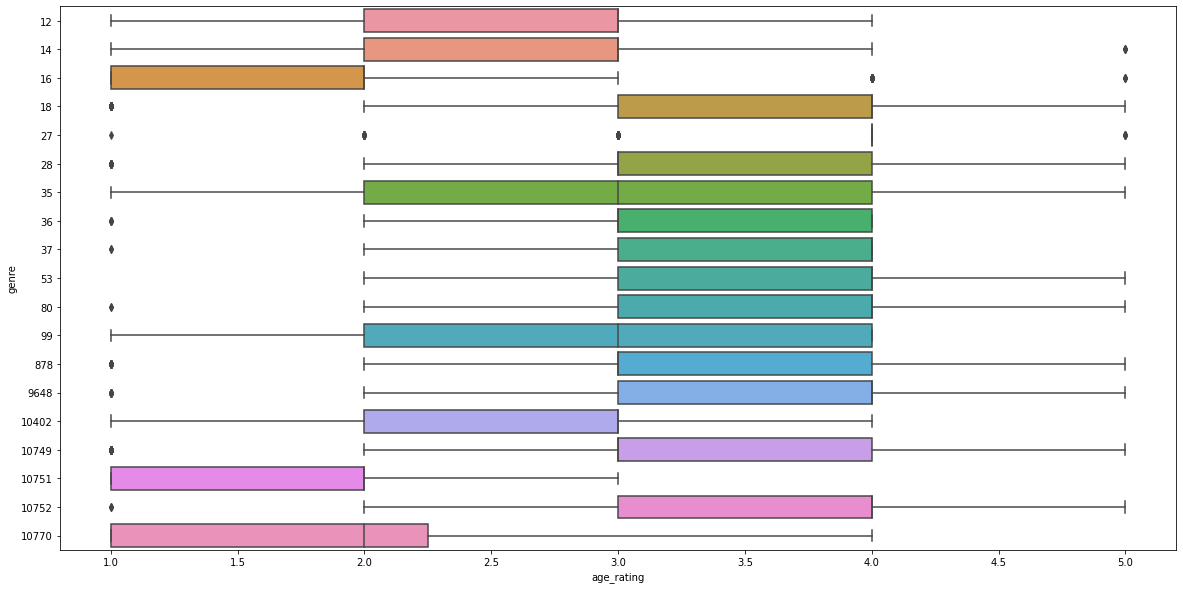

In [154]:
f = plt.figure(figsize=(20,10))
sb.boxplot( data= genres_age_mo_df, x='age_rating', y= 'genre', orient='h')

In [155]:
keyword_age = {'keyword':[],'age_rating':[]}

for i in range(4152):
    #print(df_hash_to_num['genres'][5])
    for keyword_id in df_hash_to_num['keywords'][i]:
        keyword_age['age_rating'].append(hash_table[df_hash_to_num['age_rating'][i]])
        keyword_age['keyword'].append(keyword_id)
keyword_age

{'keyword': [780,
  1820,
  1938,
  3389,
  10159,
  12554,
  167234,
  192494,
  192913,
  10159,
  163178,
  209220,
  277447,
  277448,
  409,
  3071,
  5515,
  9663,
  155954,
  11024,
  12446,
  18101,
  41645,
  196068,
  196984,
  223605,
  849,
  9715,
  9717,
  208289,
  219404,
  229266,
  803,
  3388,
  161176,
  195114,
  252937,
  268809,
  703,
  10714,
  12670,
  210608,
  679,
  3312,
  273967,
  818,
  9673,
  10791,
  2908,
  5890,
  8087,
  9748,
  10131,
  10292,
  12339,
  15378,
  155939,
  159643,
  160977,
  161184,
  210536,
  232384,
  235261,
  236055,
  14729,
  209280,
  205335,
  849,
  9715,
  9717,
  33637,
  155030,
  229266,
  265979,
  9663,
  10159,
  201947,
  242,
  1416,
  2796,
  3017,
  4048,
  10159,
  10508,
  190287,
  849,
  9717,
  187056,
  229266,
  230992,
  258270,
  282,
  2343,
  3075,
  9748,
  10821,
  14943,
  14955,
  41645,
  240145,
  11100,
  11873,
  158126,
  161791,
  196425,
  257384,
  272228,
  470,
  782,
  822,
  1191,


In [210]:
keyword_age_df = pd.DataFrame(keyword_age)
keyword_age_df = keyword_age_df [ keyword_age_df['keyword']<1000]
len(keyword_age_df)
#sb.countplot(keyword_age_df, x='keywords')

4212

## Checking relationship between age_rating and keyword

In [5]:
f = plt.figure(figsize=(20,40))
sb.boxplot( data= keyword_age_df, x='age_rating', y= 'keyword', orient='h')

NameError: name 'plt' is not defined

In [ ]:
key_age = {}

for i in range(4152):
    #print(df_hash_to_num['genres'][5])
    for genre_id in df_hash_to_num['keywords'][i]:
        if(genre_id not in key_age):
            key_age[genre_id] = []
        key_age[genre_id].append(hash_table[df_hash_to_num['age_rating'][i]])
key_age

IndentationError: expected an indented block (<ipython-input-6-f1b82739ec0e>, line 3)